In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import prince
import pickle

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from factor_analyzer import FactorAnalyzer

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv("historical&twitter-featured.csv")
data = data.drop('Unnamed: 0', axis=1)
data.head()

,ID,Venue,T1_Mat,T1_AvgRunsScored,T1_AvgRunsConceded,T1_AvgWktsTaken,T1_AvgWktsLost,T1_AvgBound,T1_W/L,T2_Mat,...,T2_AvgWktsLost,T2_AvgBound,T2_W/L,T1_TwitterVol,T2_TwitterVol,T1_FansSent,T2_FansSent,T1_FansPred,T2_FansPred,Winner
0,1,Africa,34,7.10,7.27,0.33,0.32,0.85,1.833,22,...,0.32,0.95,1.000,0.571,0.429,0.571,0.381,0.000,0.000,0
1,2,Oceania,36,8.01,7.38,0.35,0.33,0.98,1.400,30,...,0.32,0.93,1.142,0.838,0.162,0.649,0.162,0.000,0.000,0
2,3,Oceania,37,8.00,7.39,0.35,0.33,0.98,1.312,31,...,0.33,0.93,1.214,0.357,0.643,0.299,0.535,0.333,0.667,1
3,4,America,38,7.14,7.18,0.33,0.34,0.84,1.235,24,...,0.36,0.89,0.714,0.464,0.536,0.464,0.464,0.000,0.000,0
4,5,America,23,7.71,7.94,0.28,0.32,0.96,1.090,25,...,0.36,0.89,0.785,0.696,0.304,0.565,0.283,0.000,0.000,1


In [36]:
data.columns

Index(['T1_Mat', 'T1_AvgBound', 'T2_AvgRunsConceded', 'T2_AvgBound', 'T2_W/L',
       'T1_FansSent', 'T2_FansSent', 'Winner'],
      dtype='object')

In [4]:
data.shape

(519, 23)

In [ ]:
# 'T2_Mat', 'T1_AvgRunsScored/Over', 'T1_Avg_Wkts_Lost', 'T1_Bound', 'T1_Avg_Wkts_Taken', 
#                   'T2_AvgRunsScored/Over', 'T2_Avg_Wkts_Lost', 'T2_Bound', 'T1_W/L', 
#                   'T2_Twitter_Vol','T2_Fans_Sent', 'T1_Fans_Pred', 'T2_Fans_Pred'

In [3]:
data = data.drop([ 'ID', 'Venue', 'T1_AvgRunsScored', 'T1_AvgRunsConceded', 'T1_AvgWktsTaken', 'T1_AvgWktsLost',
                  'T1_W/L', 'T2_Mat', 'T2_AvgRunsScored', 'T2_AvgWktsTaken', 'T2_AvgWktsLost',  
                  'T1_FansPred', 'T2_FansPred', 'T1_TwitterVol', 'T2_TwitterVol'
                   ],axis=1)

In [19]:
# train test split
train, test= train_test_split(data, test_size = 0.2, random_state = 100)

In [20]:
train.shape, test.shape

((415, 8), (104, 8))

In [8]:
train.columns

Index(['T1_Mat', 'T1_AvgBound', 'T2_AvgRunsConceded', 'T2_AvgBound', 'T2_W/L',
       'T1_FansSent', 'T2_FansSent', 'Winner'],
      dtype='object')

In [9]:
train.dtypes

T1_Mat                  int64
T1_AvgBound           float64
T2_AvgRunsConceded    float64
T2_AvgBound           float64
T2_W/L                float64
T1_FansSent           float64
T2_FansSent           float64
Winner                  int64
dtype: object

In [10]:
num = train.select_dtypes(include='number')
num.columns

Index(['T1_Mat', 'T1_AvgBound', 'T2_AvgRunsConceded', 'T2_AvgBound', 'T2_W/L',
       'T1_FansSent', 'T2_FansSent', 'Winner'],
      dtype='object')

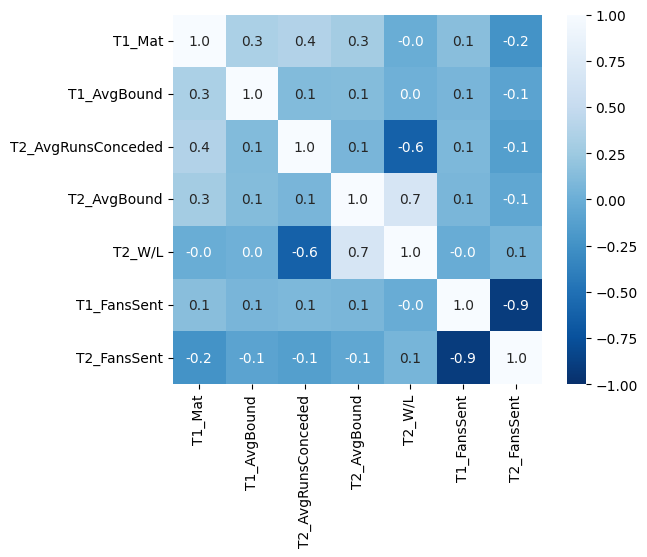

{'corr':                       T1_Mat  T1_AvgBound  T2_AvgRunsConceded  T2_AvgBound  \
 T1_Mat              1.000000     0.332670            0.372535     0.284516   
 T1_AvgBound         0.332670     1.000000            0.111365     0.118902   
 T2_AvgRunsConceded  0.372535     0.111365            1.000000     0.065965   
 T2_AvgBound         0.284516     0.118902            0.065965     1.000000   
 T2_W/L             -0.012655     0.016882           -0.622058     0.657734   
 T1_FansSent         0.145690     0.069642            0.087904     0.073357   
 T2_FansSent        -0.234994    -0.099140           -0.133754    -0.068358   
 
                       T2_W/L  T1_FansSent  T2_FansSent  
 T1_Mat             -0.012655     0.145690    -0.234994  
 T1_AvgBound         0.016882     0.069642    -0.099140  
 T2_AvgRunsConceded -0.622058     0.087904    -0.133754  
 T2_AvgBound         0.657734     0.073357    -0.068358  
 T2_W/L              1.000000    -0.021159     0.061437  
 T1_FansSe

In [11]:
# dython - all the variables
from dython.nominal import associations
associations(train.drop('Winner', axis=1), fmt='.1f', cmap='Blues_r')

## Model training

In [38]:
xtrain = train.drop(['Winner' ],axis=1) 
ytrain = train['Winner']
 
xtest = test.drop(['Winner'  ],axis=1)  
ytest = test['Winner']

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((415, 7), (104, 7), (415,), (104,))

In [22]:
# # Converting categorical features using OneHotEncoding method
# encoded_xtrain = pd.get_dummies(data= xtrain, columns=[ 'Venue'])
# encoded_xtest = pd.get_dummies(data= xtest, columns=['Venue' ])

# encoded_xtrain.shape, encoded_xtest.shape

In [39]:
st = StandardScaler()
xtrain  = st.fit_transform( xtrain)
xtest = st.fit_transform( xtest)

In [40]:
sm = SMOTE(random_state=42)
xtrain_sm, ytrain_sm = sm.fit_resample(  xtrain,ytrain) 
 
xtrain_sm.shape, ytrain_sm.shape 

((486, 7), (486,))

## Logistic regression - with hyperparameter tuning

### Lasso penalty

In [52]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [53]:
logModel  = LogisticRegression(random_state=42)
param_grid = [    
    {'solver' : [ 'newton-cg', 'lbfgs', 'liblinear', 'sag' , 'newton-cholesky'],
    'penalty' : [   'l1'  ], #'None', 'l1', 'l2', 'elasticnet'
    'C' :  [ 0.1 ],
    'max_iter': [2000]
    }
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
log_grid = GridSearchCV(logModel, param_grid = param_grid , verbose=True, n_jobs=-1, cv=cv , scoring='f1')
log_clf_hyp = log_grid.fit(xtrain_sm,ytrain_sm)

Fitting 30 folds for each of 5 candidates, totalling 150 fits


In [54]:
log_clf_hyp.best_estimator_

LogisticRegression(C=0.1, max_iter=2000, penalty='l1', random_state=42,
                   solver='liblinear')

In [55]:
# Predict the train data
y_predicted = log_clf_hyp.predict(xtrain_sm)

print('\nclassification report - logistice (l1) - train')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report - logistice (l1) - train
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       243
           1       0.63      0.67      0.65       243

    accuracy                           0.64       486
   macro avg       0.64      0.64      0.64       486
weighted avg       0.64      0.64      0.64       486

LogReg: ROC AUC =  64.0 %
LogReg: Precision =  63.2 %
LogReg: Recall =  67.1 %
LogReg: Accuracy =  64.0 %
LogReg: F1-Score =  65.1 %


array([[148,  95],
       [ 80, 163]], dtype=int64)

In [56]:
# Predict the test data
y_predicted = log_clf_hyp.predict( xtest)

print('\nclassification report - logistic(l2)+SMOTE - test ')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report - logistic(l2)+SMOTE - test 
              precision    recall  f1-score   support

           0       0.60      0.61      0.61        49
           1       0.65      0.64      0.64        55

    accuracy                           0.62       104
   macro avg       0.62      0.62      0.62       104
weighted avg       0.63      0.62      0.63       104

LogReg: ROC AUC =  62.4 %
LogReg: Precision =  64.8 %
LogReg: Recall =  63.6 %
LogReg: Accuracy =  62.5 %
LogReg: F1-Score =  64.2 %


array([[30, 19],
       [20, 35]], dtype=int64)

In [23]:
# filename = 'LR-Lasso+SMOTE.pkl'
# pickle.dump(log_clf_hyp, open(filename, 'wb'))

### Ridge penalty

In [560]:
logModel  = LogisticRegression(random_state=42)
param_grid = [    
    {'solver' : [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'],
    'penalty' : [   'l2'  ], #'None', 'l1', 'l2', 'elasticnet'
    'C' :  [ 0.0001],
    'max_iter': [2000]
    }
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
log_grid = GridSearchCV(logModel, param_grid = param_grid , verbose=True, n_jobs=-1, cv=cv , scoring='f1')
log_clf_hyp = log_grid.fit(xtrain_sm,ytrain_sm)

Fitting 30 folds for each of 6 candidates, totalling 180 fits


In [561]:
log_clf_hyp.best_estimator_

LogisticRegression(C=0.0001, max_iter=2000, random_state=42, solver='liblinear')

In [562]:
# Predict the train data
y_predicted = log_clf_hyp.predict(xtrain_sm)

print('\nclassification report-logistic(l2)+SMOTE-train')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report-logistic(l2)+SMOTE-train
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       243
           1       0.65      0.66      0.65       243

    accuracy                           0.65       486
   macro avg       0.65      0.65      0.65       486
weighted avg       0.65      0.65      0.65       486

LogReg: ROC AUC =  65.0 %
LogReg: Precision =  64.8 %
LogReg: Recall =  65.8 %
LogReg: Accuracy =  65.0 %
LogReg: F1-Score =  65.3 %


array([[156,  87],
       [ 83, 160]], dtype=int64)

In [563]:
# Predict the test data
y_predicted = log_clf_hyp.predict( xtest)

print('\nclassification report-logistic(l2)+SMOTE-test')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report-logistic(l2)+SMOTE-test
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        49
           1       0.65      0.65      0.65        55

    accuracy                           0.63       104
   macro avg       0.63      0.63      0.63       104
weighted avg       0.63      0.63      0.63       104

LogReg: ROC AUC =  63.3 %
LogReg: Precision =  65.5 %
LogReg: Recall =  65.5 %
LogReg: Accuracy =  63.5 %
LogReg: F1-Score =  65.5 %


array([[30, 19],
       [19, 36]], dtype=int64)

In [272]:
# filename = 'LR-Ridge+SMOTE.pkl'
# pickle.dump(log_clf_hyp, open(filename, 'wb'))

### elasticnet

In [35]:
logModel  = LogisticRegression(random_state=42)
param_grid = [    
    {'solver' : [ 'saga'],
    'penalty' : [   'elasticnet'  ], #'None', 'l1', 'l2', 'elasticnet'
    'C' :  [ 0.01],
    'max_iter': [2000],
    'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    }
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
log_grid = GridSearchCV(logModel, param_grid = param_grid , verbose=True, n_jobs=-1, cv=cv , scoring='f1')
log_clf = log_grid.fit(xtrain_sm,ytrain_sm)

Fitting 30 folds for each of 9 candidates, totalling 270 fits


In [36]:
log_clf.best_estimator_

LogisticRegression(C=0.01, l1_ratio=0.2, max_iter=2000, penalty='elasticnet',
                   random_state=42, solver='saga')

In [37]:
# Predict the train data
y_predicted = log_clf.predict(xtrain_sm)

print('\nclassification report-logistic(enet)+SMOTE-train')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report-logistic(enet)+SMOTE-train
              precision    recall  f1-score   support

           0       0.67      0.57      0.62       243
           1       0.62      0.71      0.67       243

    accuracy                           0.64       486
   macro avg       0.64      0.64      0.64       486
weighted avg       0.64      0.64      0.64       486

LogReg: ROC AUC =  64.2 %
LogReg: Precision =  62.5 %
LogReg: Recall =  71.2 %
LogReg: Accuracy =  64.2 %
LogReg: F1-Score =  66.5 %


array([[139, 104],
       [ 70, 173]], dtype=int64)

In [38]:
# Predict the test data
y_predicted = log_clf.predict( xtest)

print('\nclassification report-logistic(enet)+SMOTE-test')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report-logistic(enet)+SMOTE-test
              precision    recall  f1-score   support

           0       0.62      0.61      0.62        49
           1       0.66      0.67      0.67        55

    accuracy                           0.64       104
   macro avg       0.64      0.64      0.64       104
weighted avg       0.64      0.64      0.64       104

LogReg: ROC AUC =  64.2 %
LogReg: Precision =  66.1 %
LogReg: Recall =  67.3 %
LogReg: Accuracy =  64.4 %
LogReg: F1-Score =  66.7 %


array([[30, 19],
       [18, 37]], dtype=int64)

In [1016]:
# filename = 'LR-Enet+SMOTE.pkl'
# pickle.dump(log_clf_hyp, open(filename, 'wb'))

## SVM with hyperparameter tuning

### SVM

In [39]:
from sklearn.svm import SVC

In [168]:
# model = SVC(random_state=42)
# parameters = [{'C': [  0.1], 'kernel': ['linear']},
#               {'C': [  0.1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator = model,
#                            param_grid = parameters,
#                            scoring = 'f1',
#                            cv = cv,
#                            n_jobs = -1)
# grid_search = grid_search.fit(xtrain_sm, ytrain_sm)

In [40]:
# define model
model = SVC(random_state=42, probability=True)

# define grid search
param_grid = [    
{'kernel' : [ 'rbf',  'linear' ],
     'gamma' :['scale', 'auto' ],
    'C': [0.006  ] # 4e-2 
 
    }
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, verbose=True, n_jobs=-1, cv=cv , scoring = 'f1', error_score=0)
svm_clf = grid_search.fit(xtrain_sm, ytrain_sm)

Fitting 30 folds for each of 4 candidates, totalling 120 fits


In [41]:
svm_clf.best_estimator_

SVC(C=0.006, kernel='linear', probability=True, random_state=42)

In [42]:
svm_clf.best_params_, svm_clf.best_score_

({'C': 0.006, 'gamma': 'scale', 'kernel': 'linear'}, 0.6586197589134035)

In [43]:
# Predict the train data
y_predicted = svm_clf.predict(xtrain_sm)

print('\nclassification report- SVM+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) 
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report- SVM+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.67      0.61      0.64       243
           1       0.64      0.70      0.67       243

    accuracy                           0.65       486
   macro avg       0.66      0.65      0.65       486
weighted avg       0.66      0.65      0.65       486

 ROC AUC =  65.4 %
 Precision =  64.3 %
 Recall =  69.5 %
 Accuracy =  65.4 %
 F1-Score =  66.8 %


array([[149,  94],
       [ 74, 169]], dtype=int64)

In [44]:
# Predict the test data
y_predicted = svm_clf.predict(xtest)

print('\nclassification report- SVM+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted))  
print(' ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- SVM+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.62      0.59      0.60        49
           1       0.65      0.67      0.66        55

    accuracy                           0.63       104
   macro avg       0.63      0.63      0.63       104
weighted avg       0.63      0.63      0.63       104

 ROC AUC =  63.2 %
 Precision =  64.9 %
 Recall =  67.3 %
 Accuracy =  63.5 %
 F1-Score =  66.1 %


array([[29, 20],
       [18, 37]], dtype=int64)

In [1355]:
# filename = 'SVM+SMOTE.pkl'
# pickle.dump(grid_search, open(filename, 'wb'))

## KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

In [16]:
pipe = Pipeline([
('classifier', KNeighborsClassifier())
])

In [48]:
parameters = { 
 'classifier__n_neighbors': [ 55],
 'classifier__p': [1, 2],
 'classifier__leaf_size':   [1, 5, 10, 15],
 'classifier__weights': ['uniform'  ],
 'classifier__metric' : [ 'manhattan', 'minkowski', 'euclidean']
}

In [49]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(pipe, parameters,verbose=True, n_jobs=-1, cv=cv , scoring = 'f1', error_score=0).fit(xtrain_sm  , ytrain_sm  )

Fitting 30 folds for each of 24 candidates, totalling 720 fits


In [50]:
grid.best_params_, grid.best_score_

({'classifier__leaf_size': 1,
  'classifier__metric': 'minkowski',
  'classifier__n_neighbors': 55,
  'classifier__p': 2,
  'classifier__weights': 'uniform'},
 0.6203674680942283)

In [51]:
y_predicted = grid.predict(xtrain_sm)

print('\nclassification report -  RF+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  RF+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.64      0.64      0.64       243
           1       0.64      0.64      0.64       243

    accuracy                           0.64       486
   macro avg       0.64      0.64      0.64       486
weighted avg       0.64      0.64      0.64       486

 ROC AUC =  63.8 %
 Precision =  63.8 %
 Recall =  63.8 %
 Accuracy =  63.8 %
 F1-Score =  63.8 %


array([[155,  88],
       [ 88, 155]], dtype=int64)

In [52]:
# Predict the test data
y_predicted = grid.predict(xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.58      0.59      0.59        49
           1       0.63      0.62      0.62        55

    accuracy                           0.61       104
   macro avg       0.60      0.61      0.60       104
weighted avg       0.61      0.61      0.61       104

Random Forest: ROC AUC =  60.5 %
Random Forest: Precision =  63.0 %
Random Forest: Recall =  61.8 %
Random Forest: Accuracy =  60.6 %
Random Forest: F1-Score =  62.4 %


array([[29, 20],
       [21, 34]], dtype=int64)

## GNB

In [45]:
import random

def set_random_seed(seed=100):
  np.random.seed(seed)
  random.seed(seed)
    
set_random_seed(100)

In [46]:
from sklearn.naive_bayes import GaussianNB

gnb_clf  = GaussianNB(var_smoothing=10e-2 ) 
gnb_clf.fit(xtrain_sm, ytrain_sm)

GaussianNB(var_smoothing=0.1)

In [47]:
y_predicted = gnb_clf.predict(xtrain_sm)

print('\nclassification report -  RF+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  RF+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.65      0.61      0.63       243
           1       0.63      0.68      0.66       243

    accuracy                           0.64       486
   macro avg       0.64      0.64      0.64       486
weighted avg       0.64      0.64      0.64       486

 ROC AUC =  64.4 %
 Precision =  63.5 %
 Recall =  67.9 %
 Accuracy =  64.4 %
 F1-Score =  65.6 %


array([[148,  95],
       [ 78, 165]], dtype=int64)

In [48]:
# Predict the test data
y_predicted = gnb_clf.predict(xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.61      0.61      0.61        49
           1       0.65      0.65      0.65        55

    accuracy                           0.63       104
   macro avg       0.63      0.63      0.63       104
weighted avg       0.63      0.63      0.63       104

Random Forest: ROC AUC =  63.3 %
Random Forest: Precision =  65.5 %
Random Forest: Recall =  65.5 %
Random Forest: Accuracy =  63.5 %
Random Forest: F1-Score =  65.5 %


array([[30, 19],
       [19, 36]], dtype=int64)

## Random Forest

## random forest - with hyperparameter tuning

In [21]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV # For optimization

In [51]:
# define models and parameters
model = RandomForestClassifier(random_state=42)
param_grid = [    
    {'n_estimators' : [2000],
    'criterion': [ 'entropy'],
    'max_features':[0.2], #0.2
     'min_samples_leaf': [35], #90
     'oob_score':[True],
     'min_samples_split':[6]
    }
]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid= param_grid, n_jobs=-1,  cv=cv, scoring='f1',error_score='raise')
rf_clf = grid_search.fit(xtrain_sm, ytrain_sm)

In [53]:
rf_clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_features=0.2,
                       min_samples_leaf=35, min_samples_split=6,
                       n_estimators=2000, oob_score=True, random_state=42)

In [54]:
rf_clf.best_params_, rf_clf.best_score_

({'criterion': 'entropy',
  'max_features': 0.2,
  'min_samples_leaf': 35,
  'min_samples_split': 6,
  'n_estimators': 2000,
  'oob_score': True},
 0.6214550290193049)

In [52]:
y_predicted = rf_clf.predict(xtrain_sm)

print('\nclassification report -  RF+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  RF+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.69      0.70      0.70       243
           1       0.70      0.69      0.69       243

    accuracy                           0.70       486
   macro avg       0.70      0.70      0.70       486
weighted avg       0.70      0.70      0.70       486

 ROC AUC =  69.5 %
 Precision =  69.9 %
 Recall =  68.7 %
 Accuracy =  69.5 %
 F1-Score =  69.3 %


array([[171,  72],
       [ 76, 167]], dtype=int64)

In [55]:
# Predict the test data
y_predicted = rf_clf.predict(xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.63      0.69      0.66        49
           1       0.70      0.64      0.67        55

    accuracy                           0.66       104
   macro avg       0.66      0.67      0.66       104
weighted avg       0.67      0.66      0.66       104

Random Forest: ROC AUC =  66.5 %
Random Forest: Precision =  70.0 %
Random Forest: Recall =  63.6 %
Random Forest: Accuracy =  66.3 %
Random Forest: F1-Score =  66.7 %


array([[34, 15],
       [20, 35]], dtype=int64)

In [1091]:
# 67.3

In [317]:
# filename = 'RF+SMOTE.pkl'
# pickle.dump(grid_search, open(filename, 'wb'))

In [ ]:
# Venue, T1_Avg_Wkts_Taken, T1_Avg_Wkts_Lost, T1_W/L, T1_AvgRunsScored/Over, T2_Bound, T_Bound, T2_Mat, T1_Mat 
# T1_AvgRunsConceded/Over

## BOOSTING

## Gradient Boosting With XGBoost

In [41]:
import xgboost as xgb

In [42]:
model = xgb.XGBClassifier(seed = 42)
param_grid = [    
   {'learning_rate' :[1e-4],# 8 #6 #4
    'n_estimators':[2000],
 'max_depth':[7], # 7
 'min_child_weight':[ 1 ], #8 2 1
 'gamma':[0],
 'subsample':[0.25 ],  # 0.15 0.25
 'colsample_bytree':[ 0.2],  #0.2
 'objective': ['binary:logistic'],
 'nthread':[4],
 'scale_pos_weight':[1],
 'reg_alpha':[1e-5 ]
    }
]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid= param_grid,  cv=cv, n_jobs = -1, scoring='f1',error_score='raise', verbose=0 )
xgb_clf = grid_search.fit(xtrain_sm, ytrain_sm)
#,colsample_bytree':[ 0.1, 0.2 ]

In [44]:
xgb_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.2,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.0001, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', ...)

In [45]:
xgb_clf.best_params_, xgb_clf.best_score_

({'colsample_bytree': 0.2,
  'gamma': 0,
  'learning_rate': 0.0001,
  'max_depth': 7,
  'min_child_weight': 1,
  'n_estimators': 2000,
  'nthread': 4,
  'objective': 'binary:logistic',
  'reg_alpha': 1e-05,
  'scale_pos_weight': 1,
  'subsample': 0.25},
 0.6050907009327908)

In [46]:
y_predicted = grid_search.predict(xtrain_sm)

print('\nclassification report -  XG+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  XG+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.77      0.75      0.76       243
           1       0.76      0.78      0.77       243

    accuracy                           0.77       486
   macro avg       0.77      0.77      0.77       486
weighted avg       0.77      0.77      0.77       486

 ROC AUC =  76.5 %
 Precision =  75.9 %
 Recall =  77.8 %
 Accuracy =  76.5 %
 F1-Score =  76.8 %


array([[183,  60],
       [ 54, 189]], dtype=int64)

In [47]:
# Predict the test data
y_predicted =grid_search.predict( xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.71      0.65      0.68        49
           1       0.71      0.76      0.74        55

    accuracy                           0.71       104
   macro avg       0.71      0.71      0.71       104
weighted avg       0.71      0.71      0.71       104

Random Forest: ROC AUC =  70.8 %
Random Forest: Precision =  71.2 %
Random Forest: Recall =  76.4 %
Random Forest: Accuracy =  71.2 %
Random Forest: F1-Score =  73.7 %


array([[32, 17],
       [13, 42]], dtype=int64)

In [32]:
importance = grid_search.best_estimator_.feature_importances_
importance.shape

(7,)

In [33]:
train.shape

(415, 8)

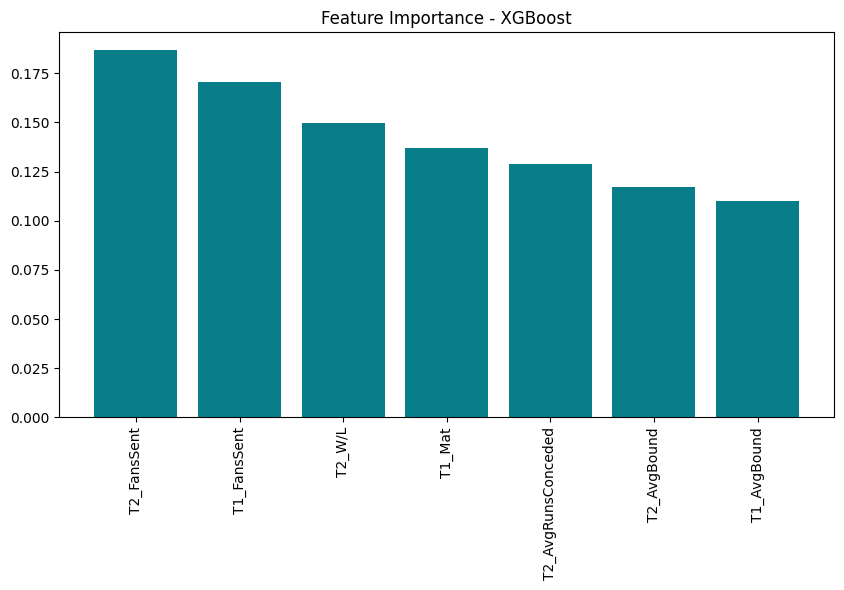

In [21]:
# get importance
importance = grid_search.best_estimator_.feature_importances_
#Important variables
importances_rf = pd.DataFrame(data = {'Attribute': train.drop(['Winner' ],axis=1).columns, 'Importance': grid_search.best_estimator_.feature_importances_})
importances_rf = importances_rf.sort_values(by='Importance', ascending = False)
#plot
plt.figure(figsize=(10,5))
plt.bar(x=importances_rf['Attribute'], height = importances_rf['Importance'], color = '#087E8B')
plt.title('Feature Importance - XGBoost')
plt.xticks(rotation='vertical')
plt.show()

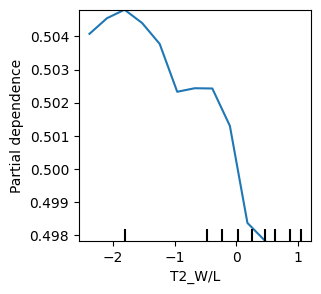

In [36]:
cols_to_use = ['T1_Mat', 'T1_AvgBound', 'T2_AvgRunsConceded', 'T2_AvgBound', 'T2_W/L',
       'T1_FansSent', 'T2_FansSent', 'Winner']
fig, ax = plt.subplots(figsize=(3,3))
display = PartialDependenceDisplay.from_estimator(grid_search,  xtrain_sm,   grid_resolution=11,  features=[4], 
                                                feature_names=cols_to_use,
                                   percentiles=(0, 0.6), ax=ax)

## Voting Classifier

In [74]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

In [85]:
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rf_clf), ('svc', svm_clf), ('xgb', xgb_clf) ],
 voting='hard')
voting_clf.fit(xtrain_sm, ytrain_sm ) 

Fitting 30 folds for each of 9 candidates, totalling 270 fits
Fitting 30 folds for each of 4 candidates, totalling 120 fits


VotingClassifier(estimators=[('lr',
                              GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
                                           estimator=LogisticRegression(random_state=42),
                                           n_jobs=-1,
                                           param_grid=[{'C': [0.01],
                                                        'l1_ratio': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
                                                                     0.9],
                                                        'max_iter': [2000],
                                                        'penalty': ['elasticnet'],
                                                        'solver': ['saga']}],
         

In [87]:
y_predicted = voting_clf.predict(xtrain_sm)

print('\nclassification report -  XG+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  XG+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.70      0.70      0.70       243
           1       0.70      0.70      0.70       243

    accuracy                           0.70       486
   macro avg       0.70      0.70      0.70       486
weighted avg       0.70      0.70      0.70       486

 ROC AUC =  70.0 %
 Precision =  70.1 %
 Recall =  69.5 %
 Accuracy =  70.0 %
 F1-Score =  69.8 %


array([[171,  72],
       [ 74, 169]], dtype=int64)

In [88]:
# Predict the test data
y_predicted =voting_clf.predict( xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.65      0.65      0.65        49
           1       0.69      0.69      0.69        55

    accuracy                           0.67       104
   macro avg       0.67      0.67      0.67       104
weighted avg       0.67      0.67      0.67       104

Random Forest: ROC AUC =  67.2 %
Random Forest: Precision =  69.1 %
Random Forest: Recall =  69.1 %
Random Forest: Accuracy =  67.3 %
Random Forest: F1-Score =  69.1 %


array([[32, 17],
       [17, 38]], dtype=int64)

## Stacking Classifier

In [99]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('lr', log_clf), ('rf', rf_clf), ('svc', svm_clf), ('xgb', xgb_clf)  ]

# Build stack model
stack_clf = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)
stack_clf.fit(xtrain_sm, ytrain_sm ) 

Fitting 30 folds for each of 9 candidates, totalling 270 fits
Fitting 30 folds for each of 4 candidates, totalling 120 fits
Fitting 30 folds for each of 9 candidates, totalling 270 fits
Fitting 30 folds for each of 9 candidates, totalling 270 fits
Fitting 30 folds for each of 9 candidates, totalling 270 fits
Fitting 30 folds for each of 9 candidates, totalling 270 fits
Fitting 30 folds for each of 9 candidates, totalling 270 fits
Fitting 30 folds for each of 4 candidates, totalling 120 fits
Fitting 30 folds for each of 4 candidates, totalling 120 fits
Fitting 30 folds for each of 4 candidates, totalling 120 fits
Fitting 30 folds for each of 4 candidates, totalling 120 fits
Fitting 30 folds for each of 4 candidates, totalling 120 fits


StackingClassifier(estimators=[('lr',
                                GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
                                             estimator=LogisticRegression(random_state=42),
                                             n_jobs=-1,
                                             param_grid=[{'C': [0.01],
                                                          'l1_ratio': [0.1, 0.2,
                                                                       0.3, 0.4,
                                                                       0.5, 0.6,
                                                                       0.7, 0.8,
                                                                       0.9],
                                                          'max_iter': [2000],
                                                          'penalty': ['elasticnet'],
                                                          'solv

In [100]:
y_predicted = stack_clf.predict(xtrain_sm)

print('\nclassification report -  XG+ SMOTE -Train')
print('\n\n')
print(classification_report(ytrain_sm, y_predicted)) # generate the precision, recall, f-1 score, num
print(' ROC AUC = ',str(round(roc_auc_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(ytrain_sm, y_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(ytrain_sm, y_predicted)*100,1)), '%')
confusion_matrix(ytrain_sm, y_predicted)


classification report -  XG+ SMOTE -Train



              precision    recall  f1-score   support

           0       0.68      0.66      0.67       243
           1       0.67      0.70      0.68       243

    accuracy                           0.68       486
   macro avg       0.68      0.68      0.68       486
weighted avg       0.68      0.68      0.68       486

 ROC AUC =  67.7 %
 Precision =  67.1 %
 Recall =  69.5 %
 Accuracy =  67.7 %
 F1-Score =  68.3 %


array([[160,  83],
       [ 74, 169]], dtype=int64)

In [101]:
# Predict the test data
y_predicted =stack_clf.predict( xtest)

print('\nclassification report- RF+ SMOTE -Test')
print('\n\n')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report- RF+ SMOTE -Test



              precision    recall  f1-score   support

           0       0.64      0.61      0.62        49
           1       0.67      0.69      0.68        55

    accuracy                           0.65       104
   macro avg       0.65      0.65      0.65       104
weighted avg       0.65      0.65      0.65       104

Random Forest: ROC AUC =  65.2 %
Random Forest: Precision =  66.7 %
Random Forest: Recall =  69.1 %
Random Forest: Accuracy =  65.4 %
Random Forest: F1-Score =  67.9 %


array([[30, 19],
       [17, 38]], dtype=int64)

### Partial Dependency Plot

In [48]:
from sklearn.inspection import plot_partial_dependence, PartialDependenceDisplay

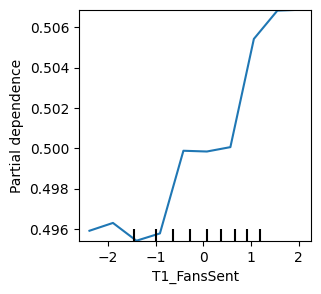

In [49]:
cols_to_use = ['T1_Mat', 'T1_AvgBound', 'T2_AvgRunsConceded', 'T2_AvgBound', 'T2_W/L',
       'T1_FansSent', 'T2_FansSent', 'Winner']
fig, ax = plt.subplots(figsize=(3,3))
display = PartialDependenceDisplay.from_estimator(grid_search,  xtrain_sm,   grid_resolution=10,  features=[5], #, 6 ,3
                                                feature_names=cols_to_use,
                                   percentiles=(0, 1), ax=ax)


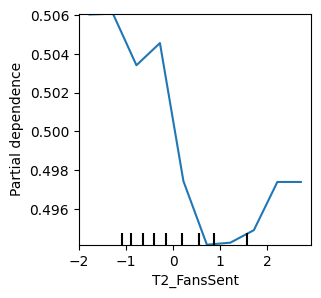

In [50]:
cols_to_use = ['T1_Mat', 'T1_AvgBound', 'T2_AvgRunsConceded', 'T2_AvgBound', 'T2_W/L',
       'T1_FansSent', 'T2_FansSent', 'Winner']
fig, ax = plt.subplots(figsize=(3,3))
display = PartialDependenceDisplay.from_estimator(grid_search,  xtrain_sm,   grid_resolution=10,  features=[6], #5, 6 ,3
                                                feature_names=cols_to_use,
                                   percentiles=(0, 1), ax=ax)

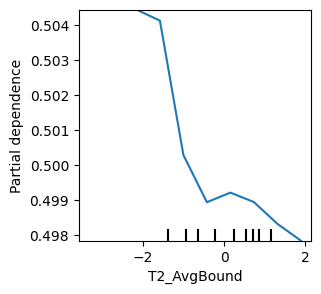

In [51]:
cols_to_use = ['T1_Mat', 'T1_AvgBound', 'T2_AvgRunsConceded', 'T2_AvgBound', 'T2_W/L',
       'T1_FansSent', 'T2_FansSent', 'Winner']
fig, ax = plt.subplots(figsize=(3,3))
display = PartialDependenceDisplay.from_estimator(grid_search,  xtrain_sm,   grid_resolution=10,  features=[3], #5, 6 ,3
                                                feature_names=cols_to_use,
                                   percentiles=(0, 1), ax=ax)